Library import 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
#this will be usefull to remove outlier easily 
from scipy import stats

Downloading the dataset 

In [5]:
#second dataset containing a subset of video with input/ouput characteristics and mesured time encoding 
df_transcoding_mesurment=pd.read_csv("transcoding_mesurment.tsv",sep="\t")

we use the last dataset define in the preprocessing 

In [6]:
display(df_transcoding_mesurment.head(5))
display(df_transcoding_mesurment.describe())

,id,duration,codec,width,height,bitrate,framerate,i,p,b,...,p_size,b_size,size,o_codec,o_bitrate,o_framerate,o_width,o_height,umem,utime
0,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,176,144,22508,0.612
1,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,320,240,25164,0.980
2,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,480,360,29228,1.216
3,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,640,480,34316,1.692
4,04t6-jw9czg,130.35667,mpeg4,176,144,54590,12.0,27,1537,0,...,825054,0,889537,mpeg4,56000,12.0,1280,720,58528,3.456


,duration,width,height,bitrate,framerate,i,p,b,frames,i_size,p_size,b_size,size,o_bitrate,o_framerate,o_width,o_height,umem,utime
count,68784.000000,68784.000000,68784.000000,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000,6.878400e+04,6.878400e+04,68784.0,6.878400e+04,6.878400e+04,68784.000000,68784.000000,68784.000000,68784.000000,68784.000000
mean,286.413921,624.934171,412.572226,6.937015e+05,23.241321,100.868312,6531.692210,9.147854,6641.708377,2.838987e+06,2.218057e+07,0.0,2.502294e+07,1.395036e+06,21.190862,802.336357,503.825541,228224.717900,9.996355
std,287.257650,463.169069,240.615472,1.095628e+06,7.224848,84.764791,6075.871744,92.516177,6153.342453,4.325137e+06,5.097306e+07,0.0,5.414402e+07,1.749352e+06,6.668703,609.959797,315.970438,97430.878373,16.107429
min,31.080000,176.000000,144.000000,8.384000e+03,5.705752,7.000000,175.000000,0.000000,192.000000,1.164800e+04,3.384500e+04,0.0,1.918790e+05,5.600000e+04,12.000000,176.000000,144.000000,22508.000000,0.184000
25%,106.765000,320.000000,240.000000,1.343340e+05,15.000000,39.000000,2374.000000,0.000000,2417.000000,3.933950e+05,1.851539e+06,0.0,2.258222e+06,1.090000e+05,15.000000,320.000000,240.000000,216820.000000,2.096000
50%,239.141660,480.000000,360.000000,2.911500e+05,25.021740,80.000000,5515.000000,0.000000,5628.000000,9.458650e+05,6.166260e+06,0.0,7.881069e+06,5.390000e+05,24.000000,480.000000,360.000000,219480.000000,4.408000
75%,379.320000,640.000000,480.000000,6.529670e+05,29.000000,138.000000,9155.000000,0.000000,9232.000000,3.392479e+06,1.515506e+07,0.0,1.977335e+07,3.000000e+06,25.000000,1280.000000,720.000000,219656.000000,10.433000
max,25844.086000,1920.000000,1080.000000,7.628466e+06,48.000000,5170.000000,304959.000000,9407.000000,310129.000000,9.082855e+07,7.689970e+08,0.0,8.067111e+08,5.000000e+06,29.970000,1920.000000,1080.000000,711824.000000,224.574000


ENCODING AND DATA COMBINATION 
- rename columns with more fitting name 
- delete useless columns providing no information (b_size and id)
- encode caterogical variable (codec ,o_codec) via one hot encoding
- combine variable (Input and Output height and width into Input Output resolution) 



In [7]:
df_transcoding_mesurment.set_axis(['id_video', 'duration', 'codec', 'width_video', 'height_video', 'bitrate', 'framerate','number_i_frames', 'number_p_frames', 'number_b_frames', 'total_frames', 'i_size', 'p_size', 'b_size', 'total_size',      'o_codec', 'o_bitrate', 'o_framerate', 'o_width', 'o_height', 'codec_allocated_memory', 'transcoding_time'], axis = 'columns',inplace =True)


In [8]:
df_transcoding_mesurment.drop(['id_video','b_size'], axis=1,inplace=True)
# normalized_df.drop(['id_video','b_size'], axis=1,inplace=True)


In [9]:
try:    
    df_transcoding_mesurment['resolution'] = df_transcoding_mesurment['width_video'] * df_transcoding_mesurment['height_video']
    df_transcoding_mesurment['resolution'].describe()
    df_transcoding_mesurment.drop('width_video', axis=1,inplace=True)
    df_transcoding_mesurment.drop('height_video', axis=1,inplace=True)
    df_transcoding_mesurment
except:
    print("la colonne resolution à déjà été créer")

In [10]:
try:    
    df_transcoding_mesurment['o_resolution'] = df_transcoding_mesurment['o_width'] * df_transcoding_mesurment['o_height']
    df_transcoding_mesurment['o_resolution'].describe()
    df_transcoding_mesurment.drop('o_width', axis=1,inplace=True)
    df_transcoding_mesurment.drop('o_height', axis=1,inplace=True)
    df_transcoding_mesurment.drop('id_video', axis=1,inplace=True)
except:
    print("la colonne resolution à déjà été créer")

la colonne resolution à déjà été créer


In [11]:
try:
    df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['codec'])
    df_transcoding_mesurment
    df_transcoding_mesurment = pd.get_dummies(df_transcoding_mesurment, columns=['o_codec'])
    df_transcoding_mesurment
except:
    print('one hot encoding déjà créer')

In [12]:
new_cols= ['duration', 'bitrate', 'framerate', 'number_i_frames',
       'number_p_frames', 'number_b_frames', 'total_frames', 'i_size',
       'p_size', 'total_size', 'o_bitrate', 'o_framerate',
       'codec_allocated_memory', 'resolution',
       'o_resolution', 'codec_flv', 'codec_h264', 'codec_mpeg4', 'codec_vp8',
       'o_codec_flv', 'o_codec_h264', 'o_codec_mpeg4', 'o_codec_vp8', 'transcoding_time']


In [13]:
order =df_transcoding_mesurment.columns.to_list()
pre_process_normalized=(df_transcoding_mesurment-df_transcoding_mesurment.mean())/df_transcoding_mesurment.std()
pre_process_normalized =pre_process_normalized[order]

DATASET preparation and prediction models

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Y = df_transcoding_mesurment['transcoding_time']
X=df_transcoding_mesurment.drop('transcoding_time', axis=1)

We split the data into train and test 

In [16]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

First we will train basic model with simple assumption 
Here we train a Linear regression model on all feature of the model 

In [17]:
# importing module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

# finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of profit. 

y_prediction =  LR.predict(x_test)
y_prediction
print(np.array(cross_val_score(LR, x_train, y_train, cv=20)).mean())

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

score=r2_score(y_test,y_prediction)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

0.648790634104156
r2 socre is  0.643272088019404
mean_sqrd_error is== 94.36387049667853
root_mean_squared error of is== 9.714106778118024


we plot the learning to get some insight on the learning process

Text(0, 0.5, 'score')

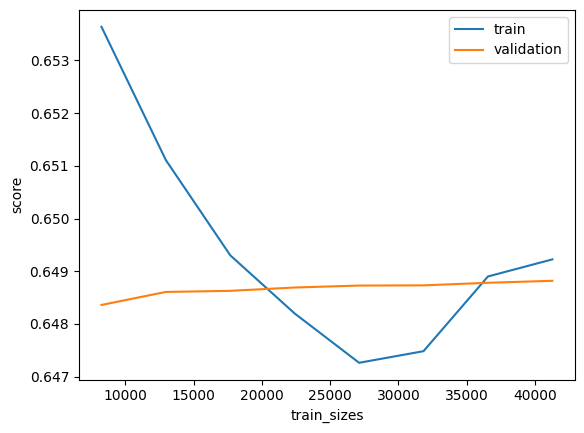

In [25]:
from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores=learning_curve(LR,x_train,y_train,train_sizes=np.linspace(0.2,1.0,8), cv=5)

# print(N)

plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
plt.plot(train_sizes,test_scores.mean(axis=1),label='validation')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('score')

We train a random forest classifier we the basic assumption 
-  

In [19]:
from sklearn.ensemble import RandomForestRegressor


r2 socre is  0.8675762309181223
mean_sqrd_error is== 35.0295532719741
root_mean_squared error of is== 5.918576963424071


Text(0.5, 1.0, 'learnin curve random forest')

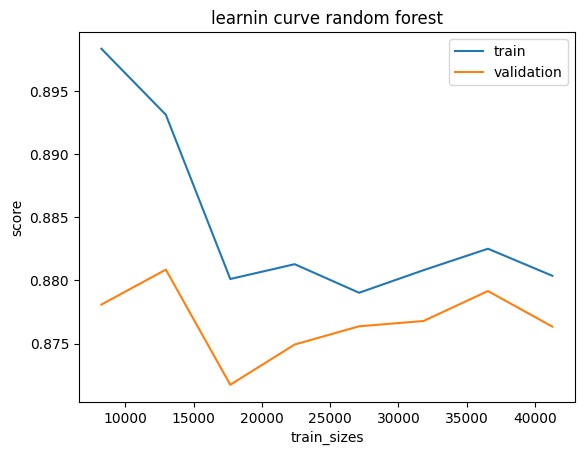

In [34]:
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
rfr = RandomForestRegressor(n_estimators=5, 
                             max_depth=5,
                             random_state=42)


rfr.fit(x_train, y_train)
y_prediction_RF = rfr.predict(x_test)
score=r2_score(y_test,y_prediction_RF)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_RF))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_RF)))




train_sizes, train_scores, test_scores=learning_curve(rfr,x_train,y_train,train_sizes=np.linspace(0.2,1.0,8), cv=5)
# print(N)
plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
plt.plot(train_sizes,test_scores.mean(axis=1),label='validation')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title("learnin curve random forest")

now we want to train a svr on the dataset 

In [35]:
#first on unscaled data 
from sklearn.svm import SVR
regressor_svr= SVR(kernel='rbf')
regressor_svr.fit(x_train,y_train)
y_prediction_SVR= regressor_svr.predict(x_test)

score=r2_score(y_test,y_prediction_SVR)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_SVR))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_SVR)))


r2 socre is  0.026982460083653015
mean_sqrd_error is== 257.38860920044095
root_mean_squared error of is== 16.04333535149225


now we scale the data to train the model beceause of the time it take we decide to not plot a learning curve 

beceause of the the time complexity we decide to use a sub sample knowing that the time complexity is O(n^3) 

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(X, Y, test_size = 0.80, random_state = 42)

svr_x = sc_X.fit_transform(x_train_svr)
svr_y= sc_y.fit_transform(y_train_svr.values.reshape(-1, 1) )
y_train.shape
print(y_train)


3931      1.140
51270     3.852
49468    35.538
57267     4.240
2133      1.316
          ...  
37194     5.732
6265      6.504
54886    15.285
860       2.888
15795    11.281
Name: transcoding_time, Length: 51588, dtype: float64


In [46]:

svr_scaled = SVR(kernel='rbf')
svr_scaled.fit(svr_x,svr_y)
print(np.array(cross_val_score(svr_scaled, svr_x, svr_y, cv=5)).mean())


c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

[0.9134471  0.91946326 0.89072232 0.90811073 0.88218768]


c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hugod\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataC

Text(0.5, 1.0, 'learnin curve svm regressor')

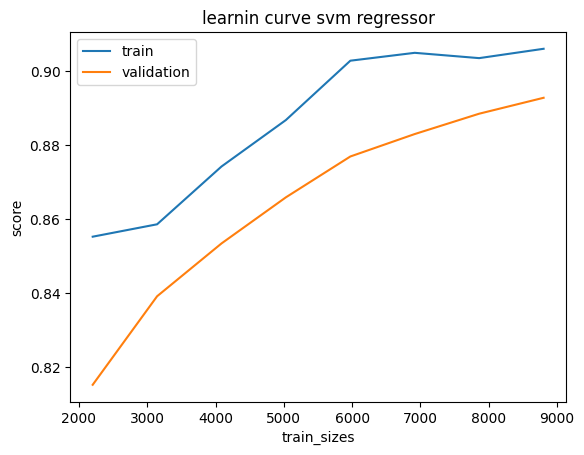

In [49]:
sc_X = StandardScaler()
sc_y = StandardScaler()

x_train_svr, x_test_svr, y_train_svr, y_test_svr = train_test_split(X, Y, test_size = 0.2, random_state = 42)

svr_x = sc_X.fit_transform(x_train_svr)
svr_y= sc_y.fit_transform(y_train_svr.values.reshape(-1, 1) )
y_train.shape
# print(y_train)

train_sizes, train_scores, test_scores=learning_curve(svr_scaled,svr_x,svr_y,train_sizes=np.linspace(0.05,0.2,8), cv=5)
# print(N)
plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
plt.plot(train_sizes,test_scores.mean(axis=1),label='validation')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title("learnin curve svm regressor")

we can see that the score on 

beceause we know that the more feature the more computational time the process will take we decide to make a feature selection among are value 

In [50]:
from sklearn.inspection import permutation_importance
import time
forest = RandomForestRegressor(random_state=0)
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [51]:
feature_names = X.columns.to_list()
result = permutation_importance(forest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=4)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

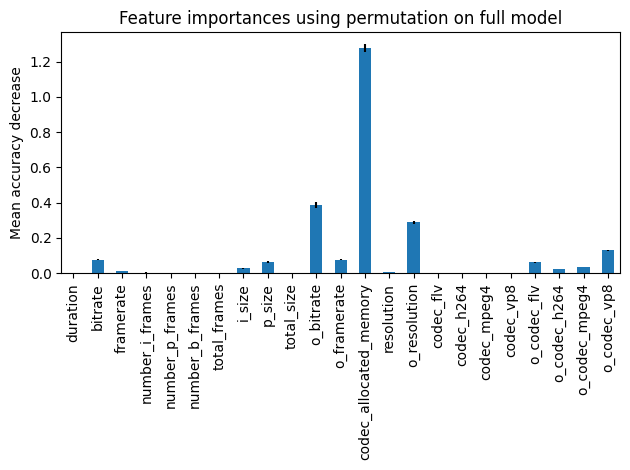

In [52]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Now using this feature we decide to create a new dataset only using the most important features

In [54]:
X_less_feat = X[['codec_allocated_memory','o_bitrate','o_resolution','bitrate','i_size','p_size','o_framerate','o_codec_vp8','o_codec_flv',
'o_codec_h264','o_codec_mpeg4']]
Y_less_feat = Y 
x_less_train, x_less_test, y_less_train, y_less_test_svr = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# x_less_train =  

Text(0.5, 1.0, 'learning curve linear regression less features')

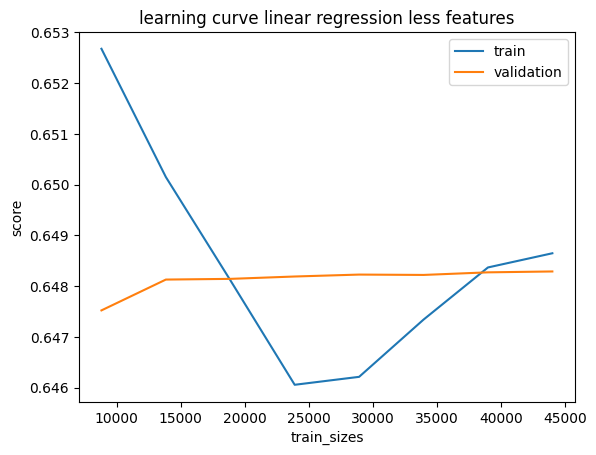

In [55]:
LR2 = LinearRegression()


LR2.fit(x_less_train,y_less_train)
train_sizes, train_scores, test_scores=learning_curve(LR2,x_less_train,y_less_train,train_sizes=np.linspace(0.2,1,8), cv=5)

plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
plt.plot(train_sizes,test_scores.mean(axis=1),label='validation')
plt.legend()
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title("learning curve linear regression less features")


we want to establish the most important features 

In [ ]:
# from sklearn.inspection import permutation_importance
# import time
# forest = RandomForestRegressor(random_state=0)
# forest.fit(x_train, y_train)

: 

: 

In [ ]:

# feature_names = X.columns.to_list()
# start_time = time.time()
# result = permutation_importance(
#     forest, x_test, y_test, n_repeats=10, random_state=42, n_jobs=4
# )
# elapsed_time = time.time() - start_time
# print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 50.820 seconds


In [ ]:
# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
# ax.set_title("Feature importances using permutation on full model")
# ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
# plt.show()

In [ ]:
# after looking at the feature importance plot we decide to prioritize certain features 

LR2 = LinearRegression()
# fitting the training data
LR2.fit(x_train[['codec_allocated_memory','o_bitrate','o_resolution','bitrate','i_size','p_size','o_framerate','o_codec_vp8','o_codec_flv',
'o_codec_h264','o_codec_mpeg4']],y_train)


# finally, if we execute this then our model will be ready, now we have x_test data we use this data for the prediction of profit. 

y_prediction_pruned_model =  LR2.predict(x_test[['codec_allocated_memory','o_bitrate','o_resolution','bitrate','i_size','p_size','o_framerate','o_codec_vp8',
'o_codec_flv','o_codec_h264','o_codec_mpeg4']])
y_prediction_pruned_model


score=r2_score(y_test,y_prediction_pruned_model)
print('r2 socre is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_pruned_model))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_pruned_model)))

In [ ]:
result.importances_std[2]

0.0006512951053298958

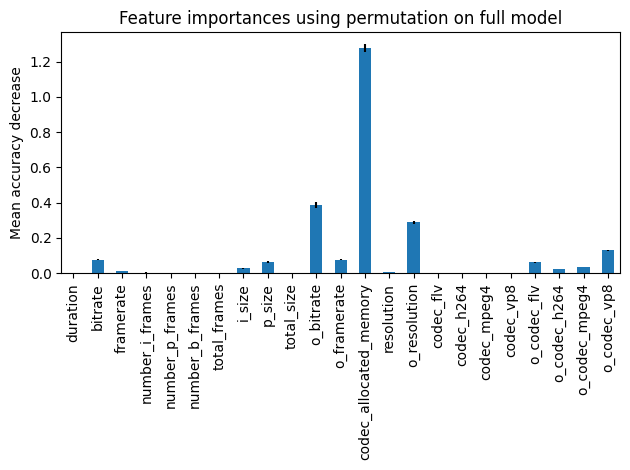

we now decide to train a random forest on our data 

In [ ]:
x_train.columns

Index(['duration', 'bitrate', 'framerate', 'number_i_frames',
       'number_p_frames', 'number_b_frames', 'total_frames', 'i_size',
       'p_size', 'total_size', 'o_bitrate', 'o_framerate',
       'codec_allocated_memory', 'resolution', 'o_resolution', 'codec_flv',
       'codec_h264', 'codec_mpeg4', 'codec_vp8', 'o_codec_flv', 'o_codec_h264',
       'o_codec_mpeg4', 'o_codec_vp8'],
      dtype='object')

In [ ]:
# rfr = RandomForestRegressor(n_estimators=5, 
#                              max_depth=3,
#                              random_state=42)


# rfr.fit(x_train, y_train)
# y_prediction_RF = rfr.predict(x_test)
# score=r2_score(y_test,y_prediction_RF)
# print('r2 socre is ',score)
# print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction_RF))
# print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction_RF)))




# train_sizes, train_scores, test_scores=learning_curve(forest,x_train,y_train,train_sizes=np.linspace(0.2,1.0,10), cv=10)
# # print(N)
# plt.plot(train_sizes,train_scores.mean(axis=1),label='train')
# plt.plot(train_sizes,test_scores.mean(axis=1),label='validation')
# plt.legend()
# plt.xlabel('train_sizes')
# plt.ylabel('score')

r2 socre is  0.7562627787673785
mean_sqrd_error is== 64.47487512798398
root_mean_squared error of is== 8.029624843539327


Text(0, 0.5, 'score')

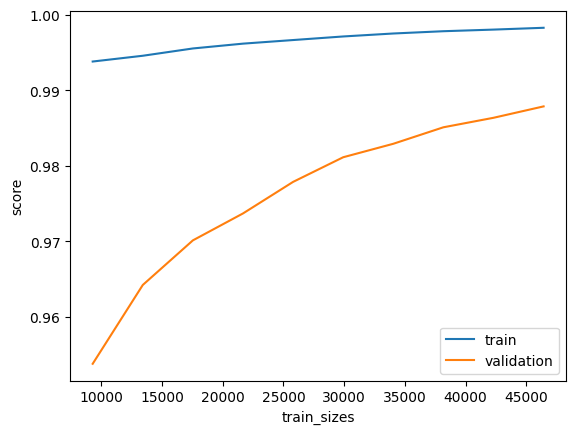